Generate plots

In [1]:
import numpy as np
import pandas as pd
import pickle
import joypy
from pathlib import Path

from isttc.scripts.cfg_global import project_folder_path

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import seaborn as sns

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'

In [2]:
results_folder = project_folder_path + 'results\\synthetic\\results\\bin_size_runs\\'
fig_folder = results_folder + 'figs\\'

In [3]:
save_fig = True

### Load summary dataframes

In [4]:
def inspect(df, name):
    print(f"len {name}: {len(df)}")
    print(df.columns.tolist())

results_folder = Path(results_folder)

# From summary_tau_full_long_acf_lags_df
print('ACF, iSTTC, PersonR, iSTTC trails (сoncat)')
df_full_all = pd.read_pickle(results_folder / "full_signal\\summary_tau_full_long_lags_df.pkl")
inspect(df_full_all, "df_full_all")

df_trials_all = pd.read_pickle(results_folder / "trials\\summary_tau_trials_long_lags_df.pkl")
inspect(df_trials_all, "df_trials_all")

ACF, iSTTC, PersonR, iSTTC trails (сoncat)
len df_full_all: 985065
['unit_id', 'tau', 'tau_lower', 'tau_upper', 'fit_r_squared', 'acf_decline', 'method', 'tau_ms', 'duration_s', 'fr', 'alpha', 'tau_ms_true', 'tau_diff_abs', 'tau_diff_rel', 'ci_width', 'n_lags', 'bin_size', 'lv']
len df_trials_all: 642725
['unit_id', 'tau', 'tau_lower', 'tau_upper', 'fit_r_squared', 'acf_decline', 'method', 'tau_ms', 'n_trials', 'fr', 'alpha', 'tau_ms_true', 'tau_diff_abs', 'tau_diff_rel', 'ci_width', 'n_lags', 'bin_size', 'lv']


In [6]:
df_full_all

,unit_id,tau,tau_lower,tau_upper,fit_r_squared,acf_decline,method,tau_ms,duration_s,fr,alpha,tau_ms_true,tau_diff_abs,tau_diff_rel,ci_width,n_lags,bin_size,lv
0,0,2.523412,2.362379,2.684445,0.996707,True,acf_isttc_full,126.170618,600,7.741821,0.851099,150.923515,24.752897,16.400954,0.322066,20,50,1.307775
1,1,2.834326,2.688470,2.980182,0.997916,True,acf_isttc_full,141.716309,600,4.394396,0.858098,147.947233,6.230924,4.211585,0.291712,20,50,1.345006
2,2,4.855442,4.132395,5.578488,0.987654,True,acf_isttc_full,242.772076,600,8.587393,0.528805,267.002290,24.230214,9.074909,1.446094,20,50,1.068416
3,3,4.460909,2.176731,6.745087,0.862334,True,acf_isttc_full,223.045437,600,6.976707,0.300692,194.403797,28.641641,14.733066,4.568356,20,50,1.055631
4,4,4.609823,4.280359,4.939287,0.996987,True,acf_isttc_full,230.491166,600,0.950832,0.691458,239.986489,9.495323,3.956607,0.658928,20,50,1.357205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985060,99994,4.475841,3.973274,4.978407,0.995573,True,acf_full,268.550442,600,6.938018,0.608313,239.402724,29.147718,12.175182,1.005133,16,60,1.136797
985061,99995,1.733853,1.109046,2.358661,0.929727,True,acf_full,104.031199,600,2.672839,0.244627,125.243251,21.212051,16.936682,1.249615,16,60,1.178739
985062,99996,1.391714,1.303135,1.480294,0.997707,True,acf_full,83.502854,600,5.754497,0.596987,94.481295,10.978440,11.619697,0.177159,16,60,1.353800
985063,99997,2.321685,1.379654,3.263715,0.915569,True,acf_full,139.301076,600,5.604441,0.258915,174.189672,34.888597,20.029084,1.884061,16,60,1.064661


### Prepare extra dataframes for plotting 

In [8]:
# extract the reference tau_ms for n_lags=20
ref = df_full_all[df_full_all['n_lags'] == 20][['unit_id', 'method', 'tau_ms']]
ref = ref.rename(columns={'tau_ms': 'tau_ms_ref'})

# merge reference back onto the full dataframe
merged_full = df_full_all.merge(ref, on=['unit_id', 'method'], how='left')

# compute the difference
merged_full['tau_ms_diff'] = merged_full['tau_ms'] - merged_full['tau_ms_ref']

merged_full['tau_ms_diff_log10'] = np.log10(np.abs(merged_full['tau_ms_diff']) + 1)
merged_full['tau_diff_rel_log10'] = np.log10(merged_full['tau_diff_rel'])

merged_full

,unit_id,tau,tau_lower,tau_upper,fit_r_squared,acf_decline,method,tau_ms,duration_s,fr,...,tau_diff_abs,tau_diff_rel,ci_width,n_lags,bin_size,lv,tau_ms_ref,tau_ms_diff,tau_ms_diff_log10,tau_diff_rel_log10
0,0,2.523412,2.362379,2.684445,0.996707,True,acf_isttc_full,126.170618,600,7.741821,...,24.752897,16.400954,0.322066,20,50,1.307775,126.170618,0.000000,0.000000,1.214869
1,1,2.834326,2.688470,2.980182,0.997916,True,acf_isttc_full,141.716309,600,4.394396,...,6.230924,4.211585,0.291712,20,50,1.345006,141.716309,0.000000,0.000000,0.624446
2,2,4.855442,4.132395,5.578488,0.987654,True,acf_isttc_full,242.772076,600,8.587393,...,24.230214,9.074909,1.446094,20,50,1.068416,242.772076,0.000000,0.000000,0.957842
3,3,4.460909,2.176731,6.745087,0.862334,True,acf_isttc_full,223.045437,600,6.976707,...,28.641641,14.733066,4.568356,20,50,1.055631,223.045437,0.000000,0.000000,1.168293
4,4,4.609823,4.280359,4.939287,0.996987,True,acf_isttc_full,230.491166,600,0.950832,...,9.495323,3.956607,0.658928,20,50,1.357205,230.491166,0.000000,0.000000,0.597323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985060,99994,4.475841,3.973274,4.978407,0.995573,True,acf_full,268.550442,600,6.938018,...,29.147718,12.175182,1.005133,16,60,1.136797,264.990762,3.559680,0.658934,1.085475
985061,99995,1.733853,1.109046,2.358661,0.929727,True,acf_full,104.031199,600,2.672839,...,21.212051,16.936682,1.249615,16,60,1.178739,111.382499,-7.351300,0.921754,1.228828
985062,99996,1.391714,1.303135,1.480294,0.997707,True,acf_full,83.502854,600,5.754497,...,10.978440,11.619697,0.177159,16,60,1.353800,87.281338,-3.778484,0.679290,1.065195
985063,99997,2.321685,1.379654,3.263715,0.915569,True,acf_full,139.301076,600,5.604441,...,34.888597,20.029084,1.884061,16,60,1.064661,149.742178,-10.441102,1.058468,1.301661


In [10]:
# extract the reference tau_ms for n_lags=20
ref = df_trials_all[df_trials_all['n_lags'] == 20][['unit_id', 'method', 'tau_ms']]
ref = ref.rename(columns={'tau_ms': 'tau_ms_ref'})

# merge reference back onto the full dataframe
merged_trials = df_trials_all.merge(ref, on=['unit_id', 'method'], how='left')

# compute the difference
merged_trials['tau_ms_diff'] = merged_trials['tau_ms'] - merged_trials['tau_ms_ref']

merged_trials['tau_ms_diff_log10'] = np.log10(np.abs(merged_trials['tau_ms_diff']) + 1)
merged_trials['tau_diff_rel_log10'] = np.log10(merged_trials['tau_diff_rel'])

merged_trials

,unit_id,tau,tau_lower,tau_upper,fit_r_squared,acf_decline,method,tau_ms,n_trials,fr,...,tau_diff_abs,tau_diff_rel,ci_width,n_lags,bin_size,lv,tau_ms_ref,tau_ms_diff,tau_ms_diff_log10,tau_diff_rel_log10
0,0,4.151493,3.126755,5.176231,0.966057,True,sttc_trial_concat,207.574657,40,7.741821,...,56.651142,37.536326,2.049477,20,50,1.307775,207.574657,0.000000,0.000000,1.574452
1,1,2.191814,1.413838,2.969791,0.912406,True,sttc_trial_concat,109.590725,40,4.394396,...,38.356508,25.925803,1.555954,20,50,1.345006,109.590725,0.000000,0.000000,1.413732
2,2,21.722048,-17.281277,60.725373,0.876504,False,sttc_trial_concat,1086.102401,40,8.587393,...,819.100112,306.776438,78.006650,20,50,1.068416,1086.102401,0.000000,0.000000,2.486822
3,3,8.411610,-8.928519,25.751739,0.494420,True,sttc_trial_concat,420.580503,40,6.976707,...,226.176706,116.343770,34.680259,20,50,1.055631,420.580503,0.000000,0.000000,2.065743
4,4,1.773000,-7.726262,11.272261,0.043614,False,sttc_trial_concat,88.649979,40,0.950832,...,151.336509,63.060429,18.998523,20,50,1.357205,88.649979,0.000000,0.000000,1.799757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642720,99991,1.252060,-0.841738,3.345858,0.417821,True,pearsonr_trial_avg,75.123599,40,8.137552,...,112.346999,59.927797,4.187595,16,60,1.067393,128.679933,-53.556334,1.736845,1.777628
642721,99992,4.678907,3.050479,6.307334,0.967107,True,pearsonr_trial_avg,280.734415,40,8.633957,...,12.861359,4.801289,3.256855,16,60,1.135003,473.344273,-192.609858,2.286927,0.681358
642722,99994,12.576113,-4.544061,29.696286,0.906044,True,pearsonr_trial_avg,754.566761,40,6.938018,...,515.164037,215.187208,34.240347,16,60,1.136797,365.816445,388.750316,2.590786,2.332816
642723,99996,0.709973,-0.050006,1.469953,0.719810,True,pearsonr_trial_avg,42.598385,40,5.754497,...,51.882910,54.913420,1.519959,16,60,1.353800,66.593071,-23.994686,1.397848,1.739678


### Plots

todo add rejected units as well

In [12]:
color_acf_full = '#718190'
color_isttc_full = '#1ba9e2' 
color_pearson_trail_avg = '#f4a91c' 
color_sttc_trail_avg =  '#a49fce' 
color_sttc_trail_concat = '#955da2' 
color_abctau = '#B4464B'

colors = [color_acf_full, color_isttc_full, color_pearson_trail_avg, color_sttc_trail_concat, color_abctau]

color_trails = [color_pearson_trail_avg, color_sttc_trail_concat] 
color_full = [color_acf_full, color_isttc_full] 

In [21]:
merged_full.groupby(by=['method','bin_size'], as_index=False)['tau_ms_diff'].median()

,method,bin_size,tau_ms_diff
0,acf_full,10,0.766659
1,acf_full,40,0.225355
2,acf_full,50,0.000000
3,acf_full,60,-0.050987
4,acf_full,100,-1.620642
5,acf_isttc_full,10,0.694417
6,acf_isttc_full,40,0.480037
7,acf_isttc_full,50,0.000000
8,acf_isttc_full,60,-0.388924
9,acf_isttc_full,100,-3.120903


In [22]:
merged_trials.groupby(by=['method','bin_size'], as_index=False)['tau_ms_diff'].median()

,method,bin_size,tau_ms_diff
0,pearsonr_trial_avg,10,3.453483
1,pearsonr_trial_avg,40,1.137871
2,pearsonr_trial_avg,50,0.000000
3,pearsonr_trial_avg,60,-2.088972
4,pearsonr_trial_avg,100,-9.923613
5,sttc_trial_concat,10,2.422061
6,sttc_trial_concat,40,0.978067
7,sttc_trial_concat,50,0.000000
8,sttc_trial_concat,60,-1.858846
9,sttc_trial_concat,100,-11.541288


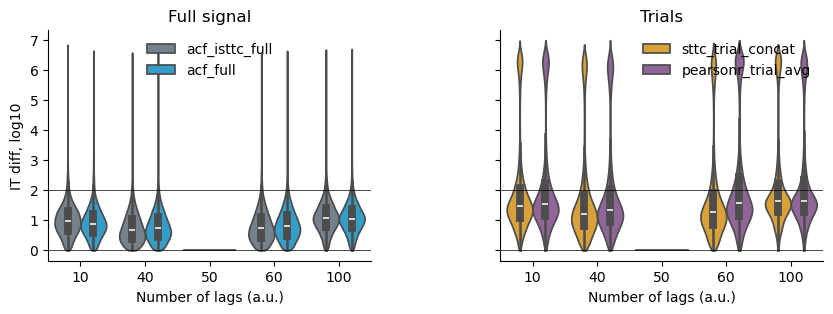

In [17]:
color = 'gray'

fig, axes = plt.subplots(1,2, figsize=(10,3), sharey=True)
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.violinplot(x='bin_size', y='tau_ms_diff_log10', hue='method', data=merged_full , cut=0, density_norm='width', 
               legend=True, palette=color_full, ax=axes[0])
axes[0].set_title('Full signal')

sns.violinplot(x='bin_size', y='tau_ms_diff_log10', hue='method', data=merged_trials , cut=0, density_norm='width', 
               legend=True, palette=color_trails, ax=axes[1])
axes[1].set_title('Trials')

#axes.set_xticklabels(['10', '20\n(reference)', '100'])

for ax in axes:
    ax.set_ylabel('IT diff, log10')
    ax.set_xlabel('Number of lags (a.u.)')
    ax.axhline(y=2, lw=0.5, c='k')
    ax.axhline(y=0, lw=0.5, c='k')
    ax.legend(frameon=False)
    sns.despine(ax=ax)

if save_fig:
    plt.savefig(fig_folder + 'it_diff_50ms_ref.png' , bbox_inches='tight', dpi=300)
    plt.savefig(fig_folder + 'it_diff_50ms_ref.svg' , bbox_inches='tight')

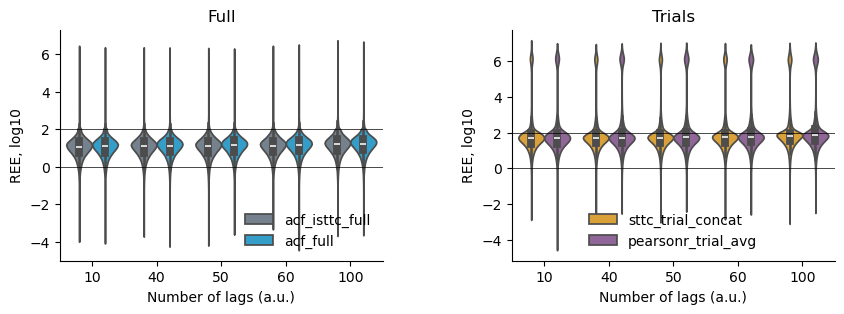

In [20]:
fig, axes = plt.subplots(1,2, figsize=(10,3))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.violinplot(x='bin_size', y='tau_diff_rel_log10', hue='method', data=merged_full , cut=0, density_norm='width', 
               legend=True, palette=color_full,  ax=axes[0])
axes[0].set_title('Full')

sns.violinplot(x='bin_size', y='tau_diff_rel_log10', hue='method', data=merged_trials , cut=0, density_norm='width', 
               legend=True, palette=color_trails, ax=axes[1])
axes[1].set_title('Trials')

for ax in axes.flat:
    ax.axhline(y=2, lw=0.5, c='k')
    ax.axhline(y=0, lw=0.5, c='k')
    ax.set_ylabel('REE, log10')
    ax.set_xlabel('Number of lags (a.u.)')
    ax.legend(frameon=False)
    sns.despine(ax=ax)

if save_fig:
    plt.savefig(fig_folder + 'ree_vs_bin_size.png' , bbox_inches='tight', dpi=300)
    plt.savefig(fig_folder + 'ree_vs_bin_size.svg' , bbox_inches='tight')